In [100]:
# <1> 
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
import scipy as sp
import seaborn as sns

In [101]:
# <2>
# load the 2017-2018 school year file "MERGED2017_18_PP.csv" 
# Don't include all columns - too many and take up computer resources (computeing power and memory)
# Only load the following 10 columns should be loaded:
# UNITID: 
# OPEID:              
# OPEID6:            
# INSTNM:          
# CITY:                      
# ZIP:               
# ADM_RATE:           
# UGDS:              
# TUITIONFEE_IN:      

df = pd.read_csv('MERGED2017_18_PP.csv',skipinitialspace = True, usecols = ['UNITID','OPEID','OPEID6','INSTNM','CITY','ZIP','ADM_RATE','UGDS','TUITIONFEE_IN'])
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN
0,100654,100200,1002,Alabama A & M University,Normal,35762,0.9027,4824.0,9857.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,35294-0110,0.9181,12866.0,8328.0
2,100690,2503400,25034,Amridge University,Montgomery,36117-3553,NaN,322.0,6900.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,35899,0.8123,6917.0,10280.0
4,100724,100500,1005,Alabama State University,Montgomery,36104-0271,0.9787,4189.0,11068.0


In [102]:
# <3>
# Load the scorecard file Most-Recent-Cohorts-Scorecard-Elements.csv from the link:
# https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Scorecard-Elements.csv
# This file has thre median earnings which is not present in the previous file
# Only load the two columns:
# UNITID - This column is the unique identity for each college and will be used to join with the previous file
# MD_EARN_WNE_P10  - This column has the median earnings
df2 = pd.read_csv('Most-Recent-Cohorts-All-Data-Elements.csv',skipinitialspace = True, usecols = ['UNITID','MD_EARN_WNE_P10'])

In [103]:
# <4> 
# Explore this file - number of colleges, head/tail/sample etc.
# Notice this file has different number of colleges from the previous file
# This indicate they are not identical and they overlap (they don't contain the same set of colleges)
df2.head()


,UNITID,MD_EARN_WNE_P10
0,100654,31000
1,100663,41200
2,100690,39600
3,100706,46700
4,100724,27700


In [104]:
df2.tail()

,UNITID,MD_EARN_WNE_P10
7107,48312404,NaN
7108,48387801,NaN
7109,48400201,NaN
7110,48778201,NaN
7111,49005401,NaN


In [105]:
df2.sample(5)

,UNITID,MD_EARN_WNE_P10
3396,222628,NaN
2758,204778,19300
1408,160612,37200
3471,226152,45800
1381,159531,PrivacySuppressed


In [106]:
print("length of file:",len(df2))

length of file: 7112


In [107]:
# <5>
#Join the two files together to produce a third file which contain all the columns of all colleges that are common to both files
dfmerged =pd.merge(df,df2, how = 'outer', on = 'UNITID')
dfmerged.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
0,100654,100200,1002,Alabama A & M University,Normal,35762,0.9027,4824.0,9857.0,31000
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,35294-0110,0.9181,12866.0,8328.0,41200
2,100690,2503400,25034,Amridge University,Montgomery,36117-3553,NaN,322.0,6900.0,39600
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,35899,0.8123,6917.0,10280.0,46700
4,100724,100500,1005,Alabama State University,Montgomery,36104-0271,0.9787,4189.0,11068.0,27700


In [108]:
# <6>
# Explore the new file
dfmerged.tail()

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
7107,48312404,108163,1081,Arizona State University at Yuma,Yuma,853656900,NaN,NaN,NaN,NaN
7108,48387801,4223701,42237,Bay Area Medical Academy - San Jose Satellite ...,San Jose,95113,NaN,NaN,NaN,NaN
7109,48400201,4228101,42281,High Desert Medical College,Lancaster,935340000,NaN,NaN,NaN,NaN
7110,48778201,4221501,42215,BCI - Malden,Malden,021480000,NaN,NaN,NaN,NaN
7111,49005401,4182601,41826,Health Career Institute- Lauderdale Lakes,Lauderdale Lakes,333137268,NaN,NaN,22575.0,NaN


In [109]:
dfmerged.sample(5)

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
1920,178402,251800,2518,University of Missouri-Kansas City,Kansas City,64110,0.6415,7854.0,8011.0,45700
635,130873,3025800,30258,Dawn Career Institute LLC,Newark,19702,NaN,108.0,NaN,25400
1199,154013,188000,1880,Mount Mercy University,Cedar Rapids,52402-4797,0.5724,1502.0,30582.0,45300
2004,181312,255700,2557,Mid-Plains Community College,North Platte,69101,NaN,1205.0,3120.0,31100
6154,481456,4216800,42168,Bonnie Joseph Academy of Cosmetology & Barbering,Heber City,84032-2044,NaN,8.0,NaN,NaN


In [110]:
print("length of second file:", len(dfmerged))
dfmerged.info()

length of second file: 7112
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 7111
Data columns (total 10 columns):
UNITID             7112 non-null int64
OPEID              7112 non-null int64
OPEID6             7112 non-null int64
INSTNM             7112 non-null object
CITY               7112 non-null object
ZIP                7112 non-null object
ADM_RATE           2037 non-null float64
UGDS               6364 non-null float64
TUITIONFEE_IN      4021 non-null float64
MD_EARN_WNE_P10    5887 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 611.2+ KB


In [111]:
# <7>
# Find out the top 100 colleges that are hardest to get in (Top 100) from this new file
dfmerged = dfmerged[dfmerged.ADM_RATE != 0]
difficultSchools = dfmerged.nsmallest(100, "ADM_RATE")
display(difficultSchools)

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
2978,211893,325100,3251,Curtis Institute of Music,Philadelphia,19103,0.0330,131.0,2675.0,PrivacySuppressed
3979,243744,130500,1305,Stanford University,Stanford,94305,0.0473,7056.0,49617.0,94000
1557,166027,215500,2155,Harvard University,Cambridge,02138,0.0516,7532.0,48949.0,89700
2302,192110,274200,2742,The Juilliard School,New York,10023-6588,0.0592,486.0,43170.0,32800
2123,186131,262700,2627,Princeton University,Princeton,08544-0070,0.0641,5246.0,47140.0,74700
...,...,...,...,...,...,...,...,...,...,...
1598,167358,219900,2199,Northeastern University,Boston,02115-5005,0.2744,13666.0,49497.0,67400
2581,199847,297800,2978,Wake Forest University,Winston-Salem,27106,0.2757,5101.0,51400.0,63800
2351,193900,278500,2785,New York University,New York,10012-1091,0.2766,26055.0,50464.0,61900
3530,228325,361600,3616,Southwestern Assemblies of God University,Waxahachie,75165,0.2788,1730.0,19994.0,35700


In [112]:
# <8>
# Display the summary statistics of the in-state tuitions of the top 100 colleges that are hardest to get in
avgTuition = difficultSchools["TUITIONFEE_IN"].mean()
print("Average tuition for the top 100 schools:", round(avgTuition))

Average tuition for the top 100 schools: 38534


Text(0, 0.5, 'Number of schools')

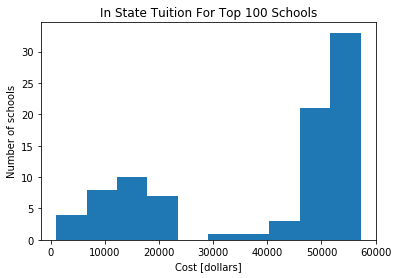

In [113]:
# <9>
# Display the histogram of the in-state tuitions of the top 100 colleges that are hardest to get in
myhisto = plt.hist((difficultSchools['TUITIONFEE_IN'])[~np.isnan(difficultSchools['TUITIONFEE_IN'])])
plt.title('In State Tuition For Top 100 Schools')
plt.xlabel('Cost [dollars]')
plt.ylabel('Number of schools')

In [114]:
# <10>
# Display the summary statistics of the earning potentials of the top 100 colleges that are hardest to get in
EarnAvg = pd.to_numeric(difficultSchools['MD_EARN_WNE_P10'], errors='coerce').mean()
print("Average earnings for top 100 school's graduates:", round(EarnAvg))
mymin = pd.to_numeric(difficultSchools['MD_EARN_WNE_P10'], errors='coerce').min()
mymax = pd.to_numeric(difficultSchools['MD_EARN_WNE_P10'], errors='coerce').max()
myrange = mymax - mymin
myxticks = []
temp = mymin
for i in range(0,10):
    myxticks.append(temp)
    temp += myrange/10

Average earnings for top 100 school's graduates: 60975


(array([12.,  3.,  7.,  9., 23., 11.,  9.,  9.,  5.,  1.]),
 array([ 25400.,  33330.,  41260.,  49190.,  57120.,  65050.,  72980.,
         80910.,  88840.,  96770., 104700.]),
 <a list of 10 Patch objects>)

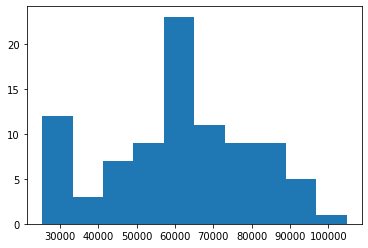

In [115]:
# <11>
# Display the histogram of the earning potentials of the top 100 colleges that are hardest to get in
df = difficultSchools[difficultSchools.MD_EARN_WNE_P10 != 'PrivacySuppressed']
EarnPot = pd.to_numeric(df['MD_EARN_WNE_P10'], errors = 'coerce')
plt.hist(EarnPot)

3979    49617
1557    48949
2302    43170
2123    47140
2233    57208
        ...  
1598    49497
2581    51400
2351    50464
3530    19994
225      6730
Name: TUITIONFEE_IN, Length: 82, dtype: int32

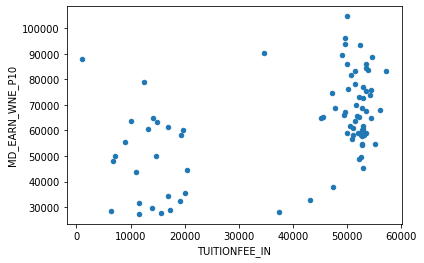

In [116]:
# <12>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Pandas
tuit = pd.to_numeric(df['TUITIONFEE_IN'], errors = 'coerce')

df = df.dropna()
df['TUITIONFEE_IN'] = df['TUITIONFEE_IN'].astype(int)
df['MD_EARN_WNE_P10'] = df['MD_EARN_WNE_P10'].astype(int)
display(df['TUITIONFEE_IN'].astype(int))
df.plot.scatter('TUITIONFEE_IN','MD_EARN_WNE_P10')

Text(0.5, 1.0, 'In state tuition and earnings of students in top 100 schools')

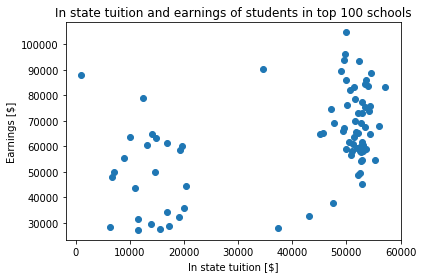

In [117]:
# <13>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Matplotlib
tuit = pd.to_numeric(df['TUITIONFEE_IN'], errors = 'coerce')
Earnings = df['MD_EARN_WNE_P10'].astype(str).astype(float)
plt.scatter(x = tuit, y = Earnings)
plt.xlabel('In state tuition [$]')
plt.ylabel('Earnings [$]')
plt.title('In state tuition and earnings of students in top 100 schools')

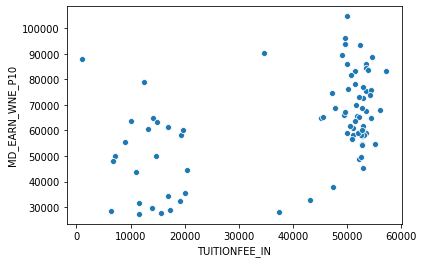

In [118]:
# <14>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Seaborn
ax = sns.scatterplot(tuit, Earnings)

In [119]:
# <15> 
# Your observation/conclusion of the scatter plot (use the following Markdown cell)

#### Based on my observation of the scatter plot,
#### There are two (at least) two groupings of student outcomes. One is that they spend alot of money on theur education and are higher erners and the other is that they do not spend as much on their education and are lower earners. There is a noticable gap in the middle - with almost no data points for spending a moderate amount on education and become moderate earners. Not accounting for loan amounts and time to pay back, the plot indicates it is 'best' to spend more on an education. Alternatively, if more expensive schools are more expensive becuase of name recognition, this graph helps the idea of 'its not what you know its who you know'